In [7]:
import numpy as np
import matplotlib.pyplot as plt

from classicalfield_orig_copy import FiniteTempGPE as gpe 
from classicalfield_orig import FiniteTempGPE as gpe2 

The following cell tests for a long time window whether the simulation still has everything flow out or if it remains stable and to make sure the simulation itself also stays stable for long time periods. Make sure energy is conserved and then we can try to implement the larger potential energy for the full tracking simulation

Total Imag Time:  1.4435226917266846
kmax:  4.0212385965949355
T:  8.085179925372403
(2, 128, 128)
(1, 128, 128)


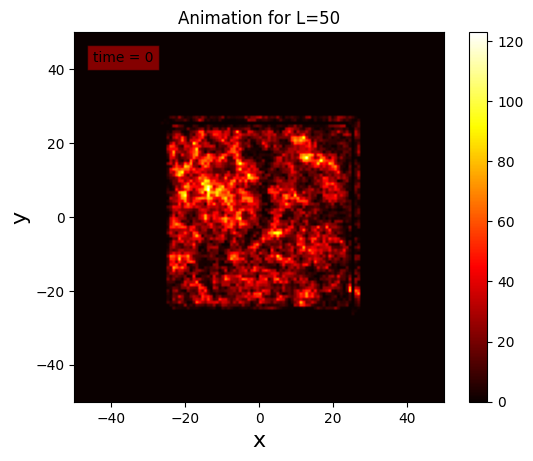

In [92]:
g = gpe(npoints = 2**6, L = 50, numImagSteps = 2000, numRealSteps = 1000, dtcoef = 0.0005, boxthickness = 0.4, Nsamples = 1, runAnim = True, animFileName='test', Tfact = 1, dst = False, vortex = True)

In [76]:
print(120/25)

4.8


28.905192749637546
126.67015
4.382262794577777


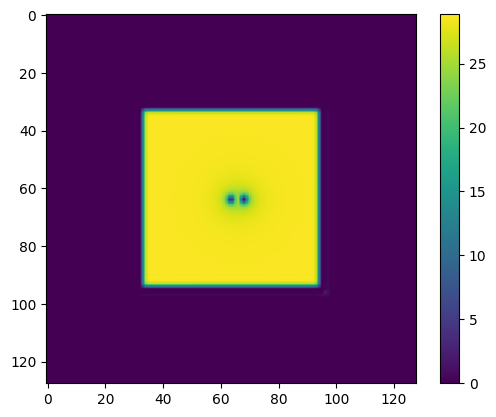

In [85]:
plt.imshow(np.abs(g.gpeobj.psi)**2) 
plt.colorbar() 
print(np.max(np.abs(g.gpeobj.psi)**2))
print(np.max(np.abs(g.snaps[-1])**2))
print(np.max(np.abs(g.snaps[-1])**2)/np.max(np.abs(g.gpeobj.psi)**2))

In [65]:
print(g.gpeobj.Natoms)
print(g.dx) 

64000
3.125


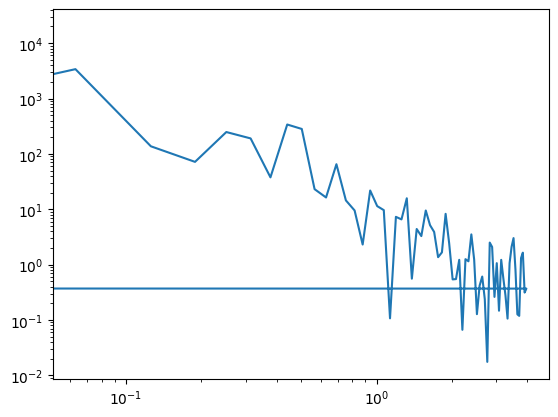

In [93]:
psik = g.genPsiK() 

plt.plot(g.ki[0][0], np.abs(psik[0])**2)
plt.yscale('log')
plt.xscale('log')

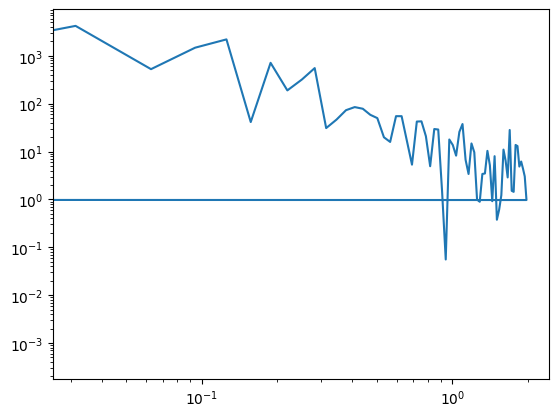

In [91]:
psik = g.genPsiK() 

plt.plot(g.ki[0][0], np.abs(psik[0])**2)
plt.yscale('log')
plt.xscale('log')

Test to see if when we raise the potential well that the simulation remains stable and the atoms are still in the box

Total Imag Time:  1.338773250579834
kmax:  4.0212385965949355
T:  8.085179925372403
(1501, 128, 128)
(1, 128, 128)


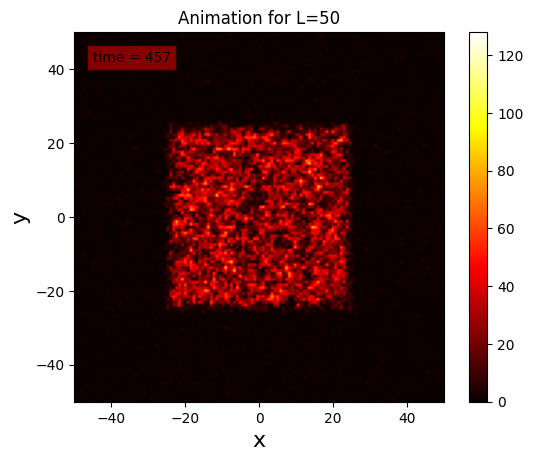

In [12]:
g = gpe2(npoints = 2**6, numImagSteps = 2000, numRealSteps = 1500000, dtcoef = 0.0005, boxthickness = 0.4, Nsamples = 1, runAnim = True, animFileName='test', Tfact = 1, dst = False, vortex = True)

In [19]:
dt = 0.00030517578125


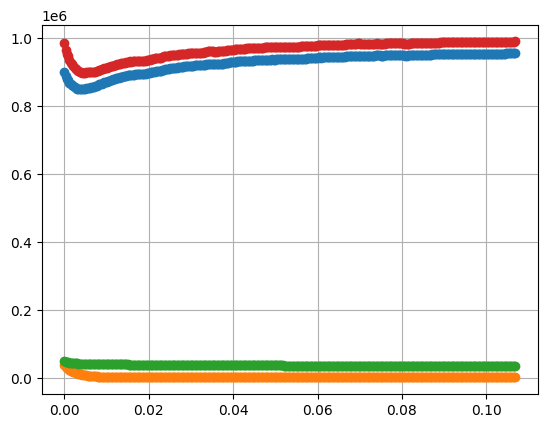

In [20]:
time = dt*np.linspace(0, len(g.Ek_arr), len(g.Ek_arr))
plt.plot(time, np.abs(g.Ek_arr), marker = 'o')
plt.plot(time, np.abs(g.Ep_arr), marker = 'o')
plt.plot(time, np.abs(g.Ei_arr), marker = 'o')
plt.plot(time, np.abs(g.Ep_arr) + np.abs(g.Ek_arr) + np.abs(g.Ei_arr), marker = 'o')
plt.grid(True) 

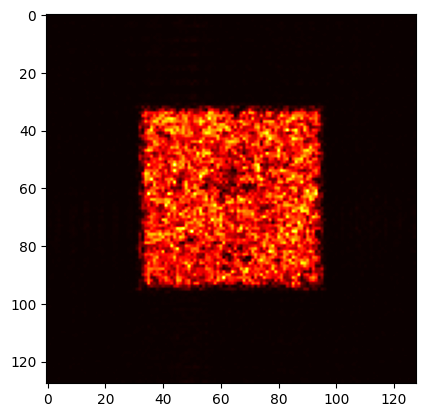

In [11]:
plt.imshow(np.abs(g.snaps[-1])**2, cmap = plt.cm.hot)